Configurando ambiente virtual `conda` e corrigindo `bug` do `hvplot` no Google Colab.

In [ ]:
if 'google.colab' in str(get_ipython()):
    try:
        import condacolab
    except:
        !pip install -q condacolab
        import condacolab
        condacolab.install()
        !git clone https://github.com/iuryt/Panthalassan
        !conda env update -n base -f /content/Panthalassan/environment.yml

importando modulos

In [8]:
import xarray as xr
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.xarray
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gdown

In [9]:
fid = '1N-EN2qAGL5ma80Ylgr2WEPAG8umYfPtr'

gdown.download(f"https://drive.google.com/uc?id={fid}", quiet=False) 

Downloading...
From: https://drive.google.com/uc?id=1N-EN2qAGL5ma80Ylgr2WEPAG8umYfPtr
To: /project/umd_amit_tandon/iury/research/projects/Panthalassan/notebooks/MEOP.nc
175MB [00:01, 123MB/s]


'MEOP.nc'

In [10]:
ds = xr.open_dataset('MEOP.nc')
ds

<xarray.Dataset>
Dimensions:    (ANIMAL: 17, N_PROF: 2564, PRES: 1000)
Coordinates:
  * N_PROF     (N_PROF) int64 0 1 2 3 4 5 6 ... 2558 2559 2560 2561 2562 2563
  * PRES       (PRES) float32 1.0 2.0 3.0 4.0 5.0 ... 997.0 998.0 999.0 1e+03
    TIME       (ANIMAL, N_PROF) datetime64[ns] ...
Dimensions without coordinates: ANIMAL
Data variables:
    TEMP       (ANIMAL, N_PROF, PRES) float32 ...
    LONGITUDE  (ANIMAL, N_PROF) float64 ...
    LATITUDE   (ANIMAL, N_PROF) float64 ...
    SPECIE     (ANIMAL) object ...
Attributes: (12/44)
    comment:                   
    number_of_ts_profiles:    0.0
    number_of_t_profiles:     1250.0
    number_chla_profiles:     0.0
    number_doxy_profiles:     0.0
    geospatial_lat_min:       61.7622
    ...                       ...
    location:                 Canada
    loc_algorithm:            L
    firmware_version:         49
    firmware_parameters:      HOOD_04B
    instr_id:                 9412
    ptt:                      44443

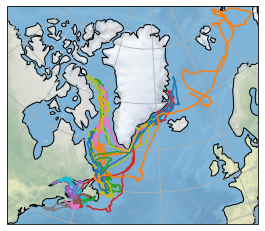

In [11]:
# An arbitrary choice.
east = 0
west = -80
north = 85
south = 37

central_longitude = -35

proj = ccrs.LambertConformal(
    central_longitude=central_longitude,
)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=proj)
ax.set_extent([west, east, south, north])
ax.stock_img()
ax.coastlines()
ax.gridlines()

_ = ax.plot(ds.LONGITUDE.T,ds.LATITUDE.T,transform=ccrs.PlateCarree())